In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [4]:
# Create path

path = r'/Users/laceymarchment/Desktop/A6'

In [5]:
# Import df_geo - merged and cleaned df

df = pd.read_csv(os.path.join(path,'df_clean.csv'))

In [6]:
# Configure API key

quandl.ApiConfig.api_key = 'ZJWk5GcszzxB_szvKicy'

In [7]:
#

data = quandl.get('FRED/NROU')

In [8]:
#

data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [9]:
data.shape

(332, 1)

In [10]:
# Check column info

data.columns

Index(['Value'], dtype='object')

In [11]:
# Check for missing values 

data.isnull().sum() 

Value    0
dtype: int64

In [12]:
# Check for duplicates

dup = data.duplicated()
dup.sum()

0

In [14]:
data.tail()

,Value
Date,
2030-10-01,4.294982
2031-01-01,4.289282
2031-04-01,4.283630
2031-07-01,4.278029
2031-10-01,4.272470


In [15]:
# Remove forcast (2020-2031)

data_2 = data.reset_index() # Reset index to make 'Data' a variable

data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2019-12-31')]

In [16]:
data_sub.head()

,Date,Value
204,2000-01-01,5.224948
205,2000-04-01,5.214622
206,2000-07-01,5.204211
207,2000-10-01,5.193731
208,2001-01-01,5.183197


In [18]:
# Setting date as index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis = 1, inplace = True)

data_sub.head()

,Value
datetime,
2000-01-01,5.224948
2000-04-01,5.214622
2000-07-01,5.204211
2000-10-01,5.193731
2001-01-01,5.183197


### 4. Create a line chart of your data.

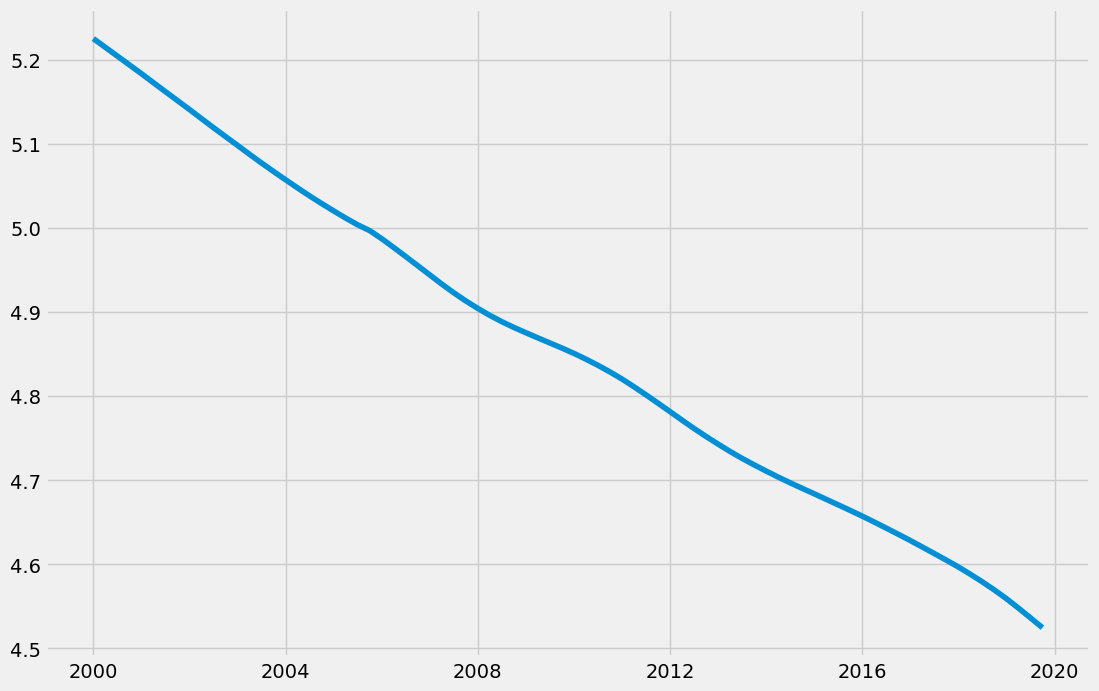

In [19]:
# Plot line chart 

plt.figure(figsize=(12,8), dpi=100) 

plt.plot(data_sub)

### 5. Decompose the data’s components. Analyze the results from the plot in a markdown cell.

In [26]:
# Decompose time series using multiplicative model

decomposition = sm.tsa.seasonal_decompose(data_sub, model = 'multiplicative')

In [33]:
# Define a fixed size for all special charts

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 12

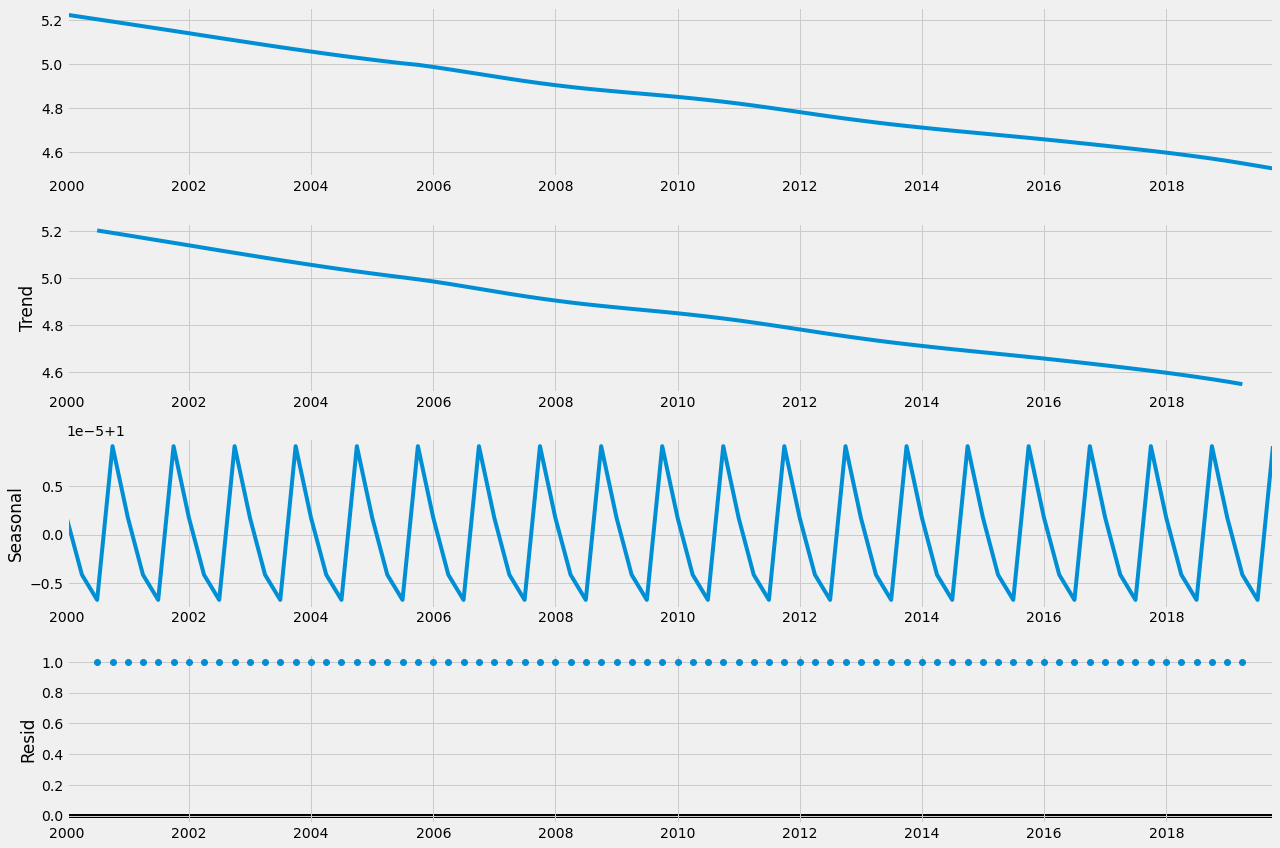

In [34]:
# Plot components

decomposition.plot()
plt.show()

#### Trend: Steady decline. Could be due to house financial crisis and property price in NYC.
#### Seasonal: Flucuates at regular intervals.  
#### Resid: Steady and high amount of noise. Represents dominant trend of decline.

### 6. Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.

In [35]:
# Perform Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)' % key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.043176
p-value                         0.737193
Number of Lags Used             4.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


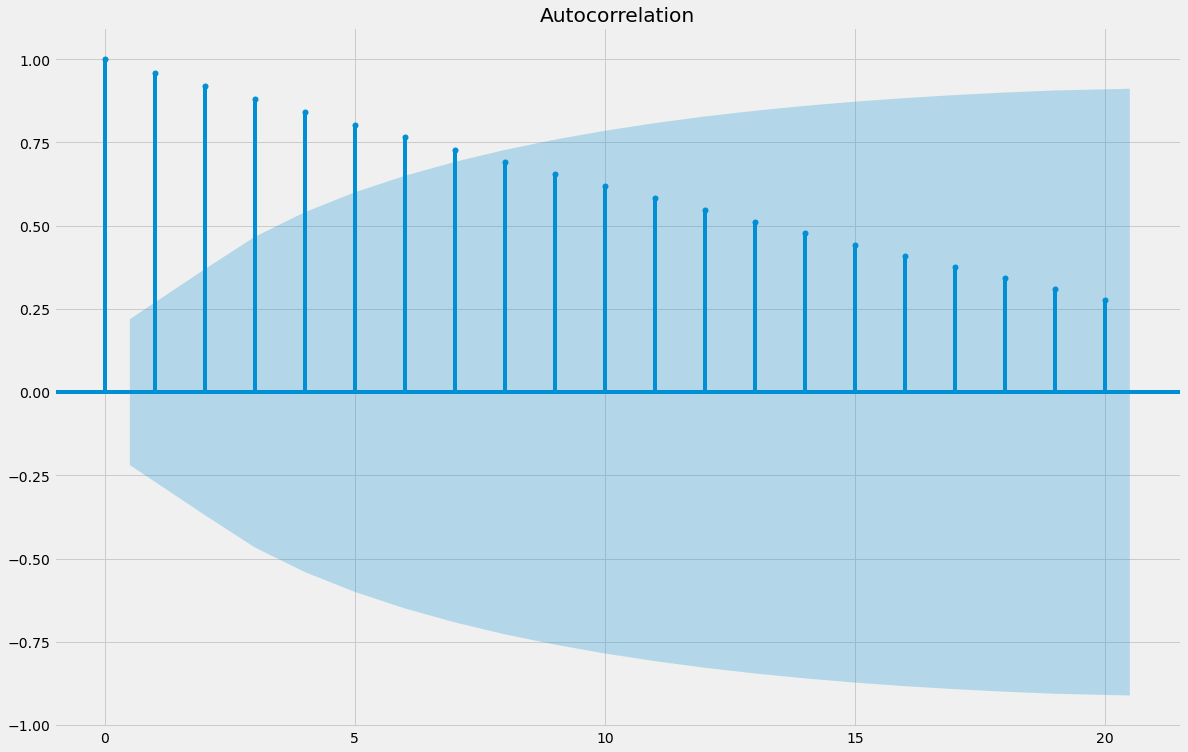

In [36]:
# Plot autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

#### Test statistic is -1.04 and the p-value is 0.74. 
#### Therefore test result is not significant as it is more than 0.05. 

#### Critical value is -2.90.
#### Therefore cannot reject the null hypothesis as much smaller than the test statistic. 

#### Indicates data is more likely unstationary. 

### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [37]:
# Calculate difference between every values and its lag

data_diff = data_sub - data_sub.shift(1) 

In [38]:
# Remove any missing values

data_diff.dropna(inplace = True) 

In [39]:
data_diff.head()

,Value
datetime,
2000-04-01,-0.010326
2000-07-01,-0.010411
2000-10-01,-0.010480
2001-01-01,-0.010534
2001-04-01,-0.010583


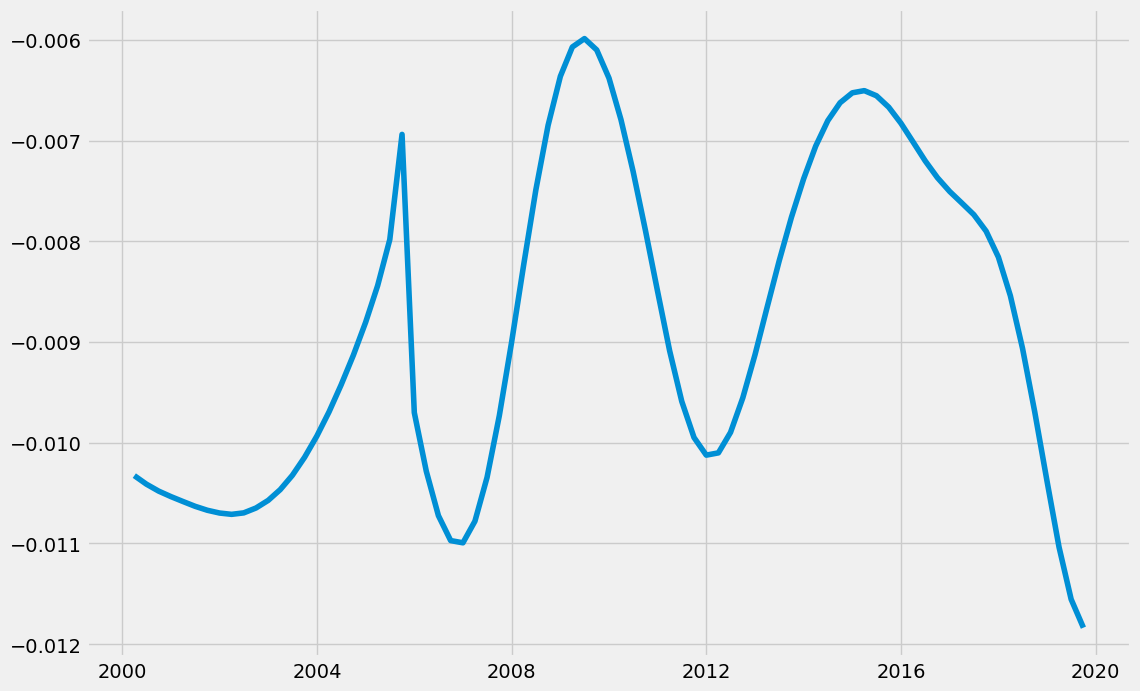

In [40]:
# Time series with differencing

plt.figure(figsize=(12,8), dpi=100)
plt.plot(data_diff)

In [41]:
# Perform Dickey-Fuller test for differencing

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.079484
p-value                         0.028109
Number of Lags Used             3.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


#### Test statistic is -3.08 and the p-value is 0.03.
#### Therefore test result is significant as it is more than 0.05.
#### Critical value is -2.90.
#### Therefore can reject the null hypothesis as test statistic is smaller than critical value, thus series is stationary

### 9. Check your data’s autocorrelations.

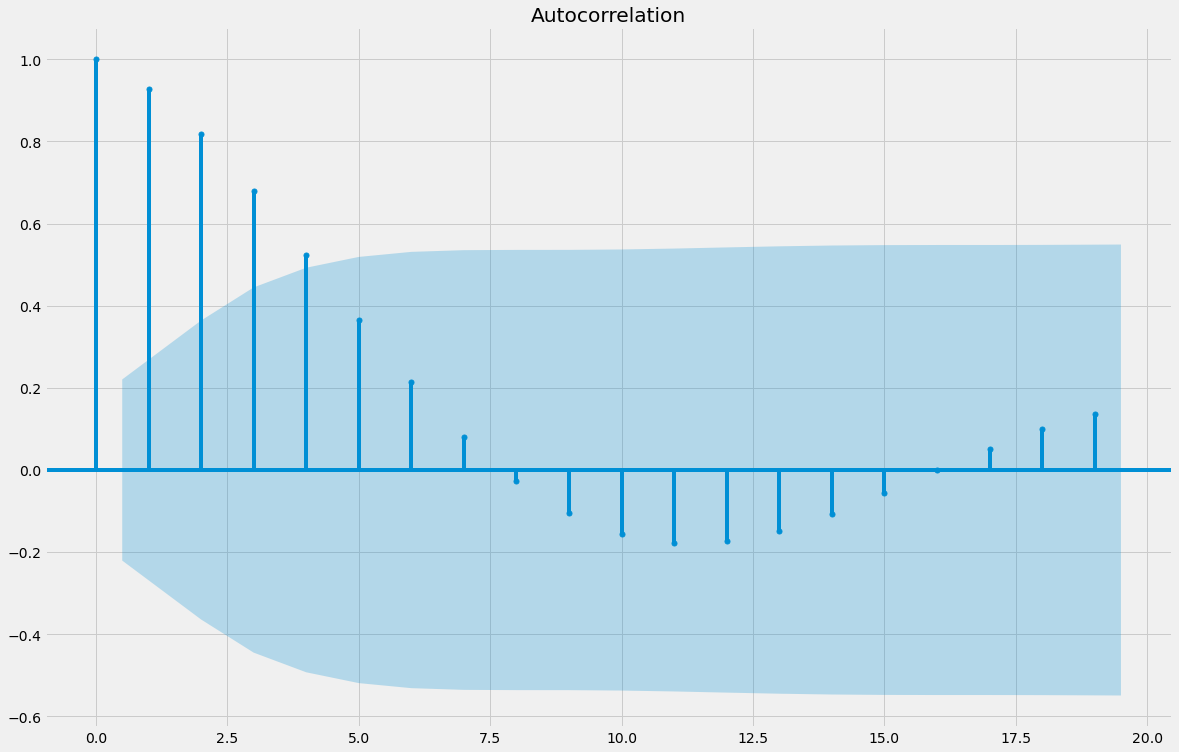

In [42]:
# Check autocorrelation

plot_acf(data_diff)
plt.show()